In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/hcho.csv')
df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12649,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12650,0.000080,Kandy Proper,2023-12-31,2024-01-01
12651,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12652,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [3]:
df['Current date'] = pd.to_datetime(df['Current date'])
df['Next date'] = pd.to_datetime(df['Next date'])

In [4]:
# Extracting year and month for seasonal analysis
df['Year'] = df['Current date'].dt.year
df['Month'] = df['Current date'].dt.month

In [5]:
df

,HCHO,Location,Current date,Next date,Year,Month
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019,1
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02,2019,1
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02,2019,1
3,0.000176,Kandy Proper,2019-01-01,2019-01-02,2019,1
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02,2019,1
...,...,...,...,...,...,...
12649,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01,2023,12
12650,0.000080,Kandy Proper,2023-12-31,2024-01-01,2023,12
12651,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01,2023,12
12652,0.000065,Kurunegala Proper,2023-12-31,2024-01-01,2023,12


In [6]:
# Grouping data by year and month for seasonal analysis
seasonal_data = df.groupby(['Year', 'Month'])['HCHO'].mean().reset_index()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

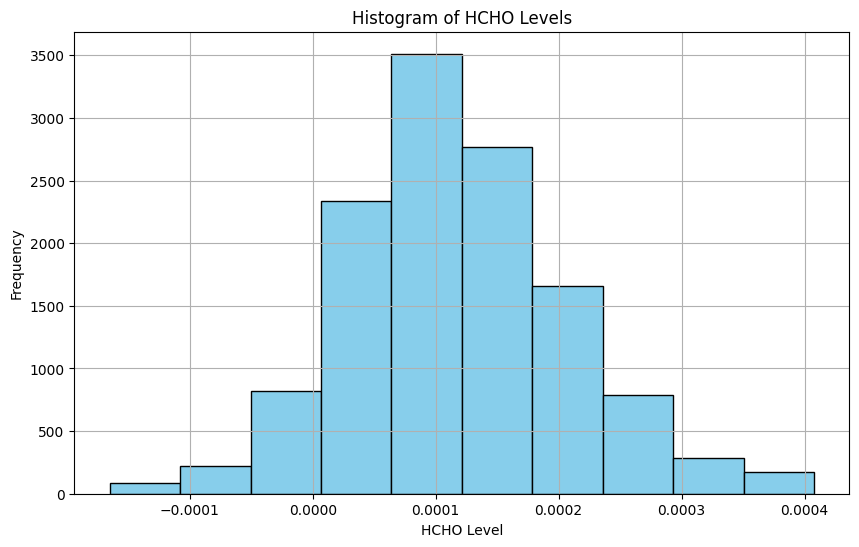

In [9]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['HCHO'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of HCHO Levels')
plt.xlabel('HCHO Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

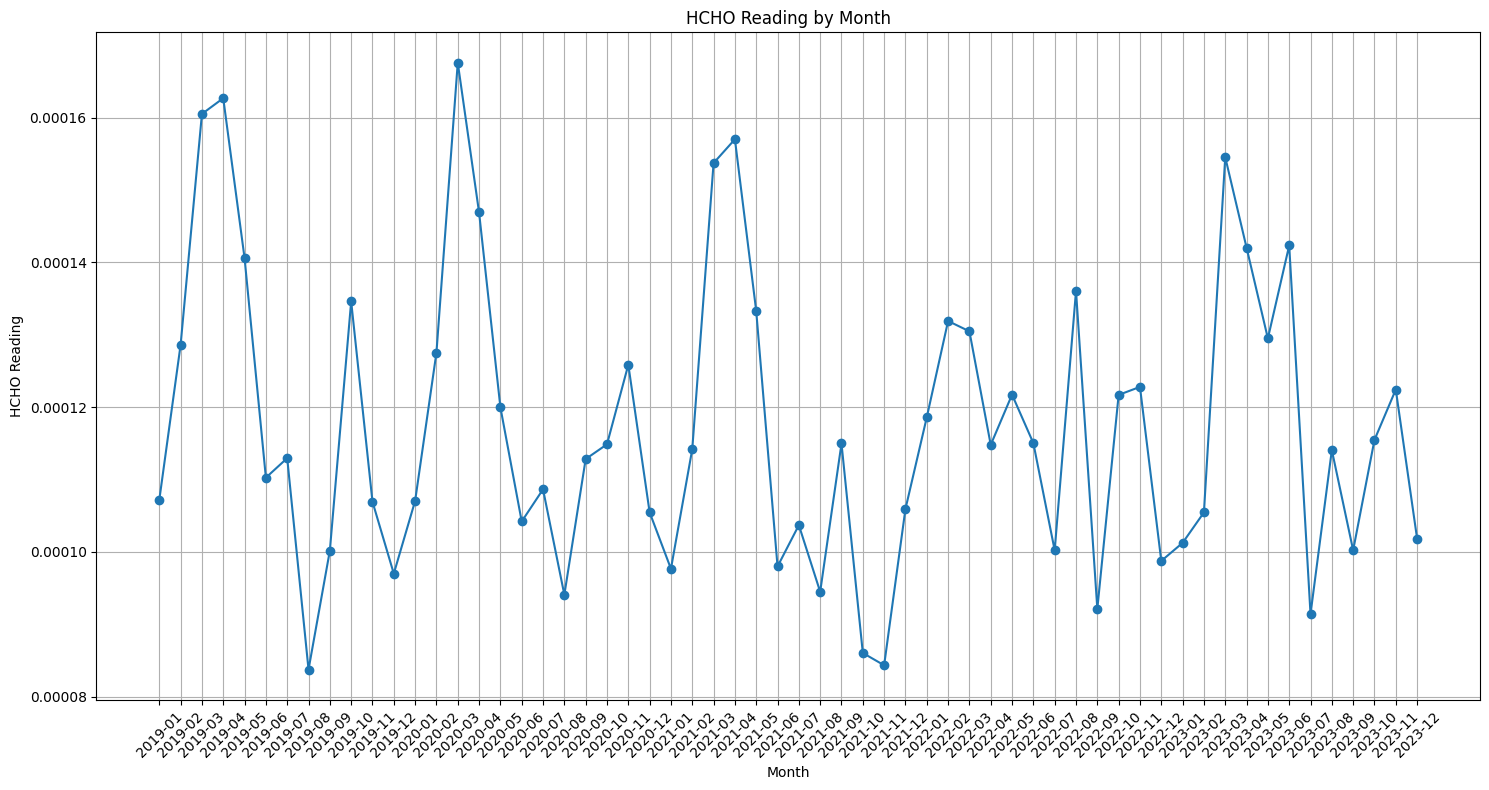

In [10]:
# Convert 'Current date' to datetime format
df['Current date'] = pd.to_datetime(df['Current date'])

# Group data by month and calculate the mean HCHO reading for each month
df_monthly = df.groupby(df['Current date'].dt.to_period("M")).agg({'HCHO': 'mean'})

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(df_monthly.index.astype(str), df_monthly['HCHO'], marker='o', linestyle='-')
plt.title('HCHO Reading by Month')
plt.xlabel('Month')
plt.ylabel('HCHO Reading')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

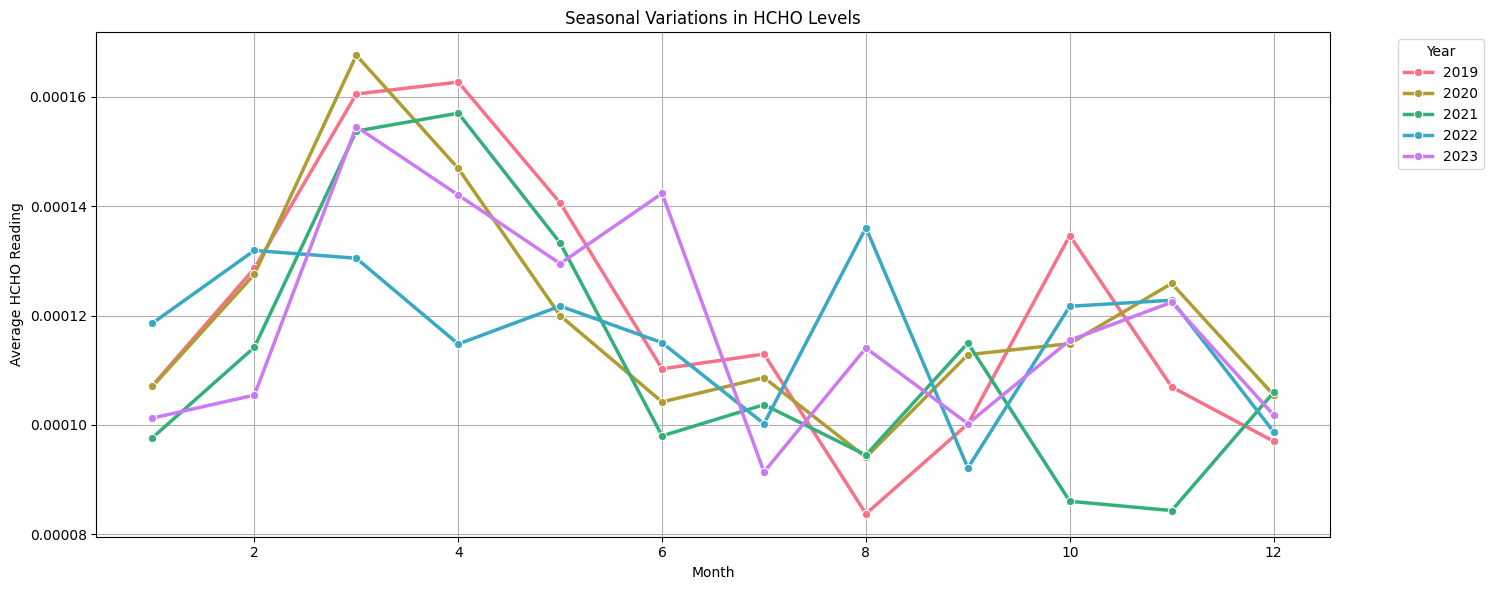

In [11]:
# Plotting seasonal variations
plt.figure(figsize=(15, 6))
palette = sns.color_palette("husl", len(seasonal_data['Year'].unique()))  # Define a custom color palette
sns.lineplot(x="Month", y="HCHO", hue="Year", data=seasonal_data, palette=palette, marker='o', linewidth=2.5)
plt.title('Seasonal Variations in HCHO Levels for each years')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

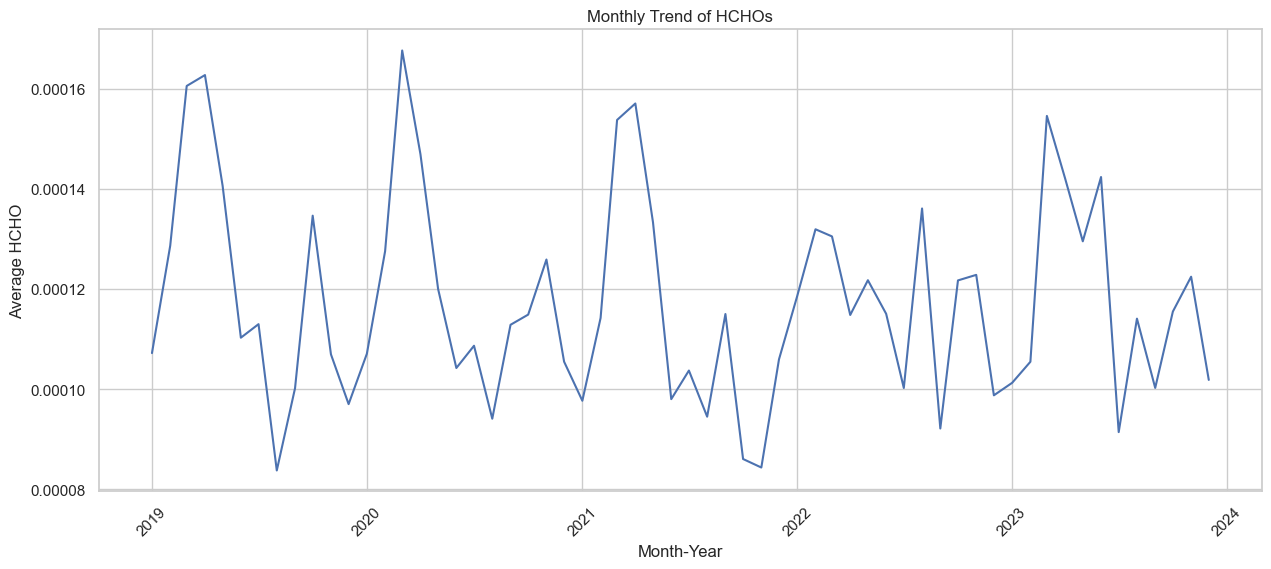

In [12]:


# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Aggregating the HCHOs on a monthly basis
df['Month-Year'] = df['Current date'].dt.to_period('M')
monthly_data = df.groupby('Month-Year')['HCHO'].mean().reset_index()

# Converting 'Month-Year' back to datetime for plotting
monthly_data['Month-Year'] = monthly_data['Month-Year'].dt.to_timestamp()

# Plotting the monthly trend of HCHOs
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month-Year', y='HCHO', data=monthly_data)
plt.title('Monthly Trend of HCHOs')
plt.xlabel('Month-Year')
plt.ylabel('Average HCHO')
plt.xticks(rotation=45)
plt.show()


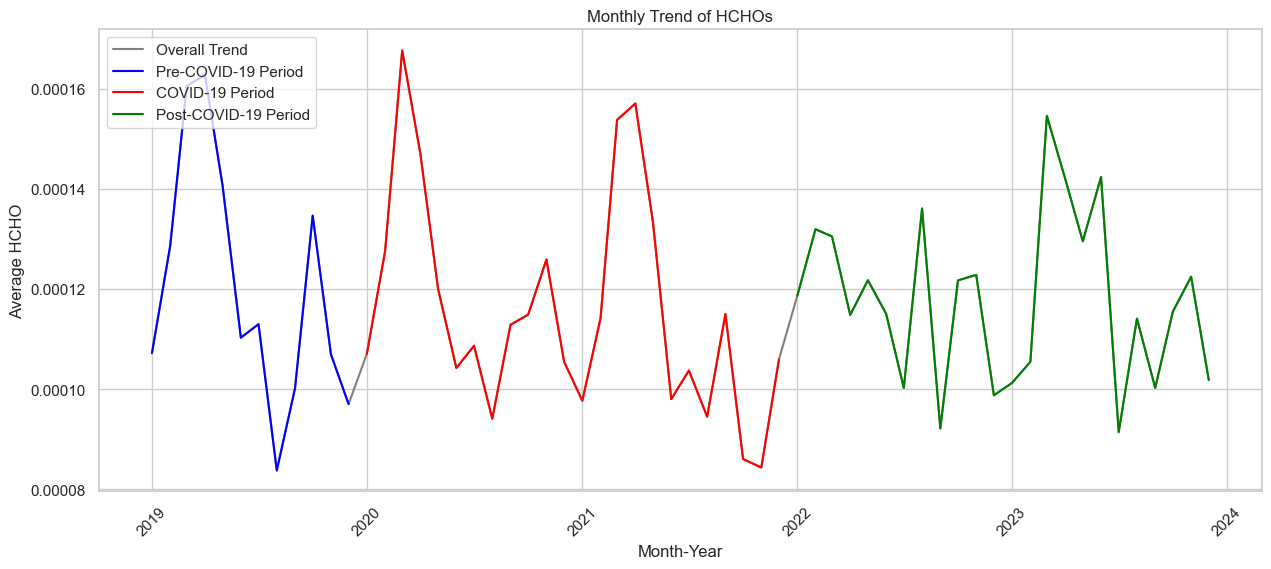

In [13]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Converting 'Current date' to datetime and extracting the month and year
df['Month-Year'] = pd.to_datetime(df['Current date']).dt.to_period('M')
monthly_data = df.groupby('Month-Year')['HCHO'].mean().reset_index()

# Converting 'Month-Year' back to datetime for plotting
monthly_data['Month-Year'] = monthly_data['Month-Year'].dt.to_timestamp()

# Plotting the monthly trend of HCHOs
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month-Year', y='HCHO', data=monthly_data, color='gray', label='Overall Trend')

# Highlighting the periods
pre_corona = monthly_data[(monthly_data['Month-Year'] >= '2019-01') & (monthly_data['Month-Year'] <= '2019-12')]
sns.lineplot(x='Month-Year', y='HCHO', data=pre_corona, color='blue', label='Pre-COVID-19 Period')

corona = monthly_data[(monthly_data['Month-Year'] >= '2020-01') & (monthly_data['Month-Year'] <= '2021-12')]
sns.lineplot(x='Month-Year', y='HCHO', data=corona, color='red', label='COVID-19 Period')

post_corona = monthly_data[monthly_data['Month-Year'] >= '2022-01']
sns.lineplot(x='Month-Year', y='HCHO', data=post_corona, color='green', label='Post-COVID-19 Period')

plt.title('Monthly Trend of HCHOs')
plt.xlabel('Month-Year')
plt.ylabel('Average HCHO')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

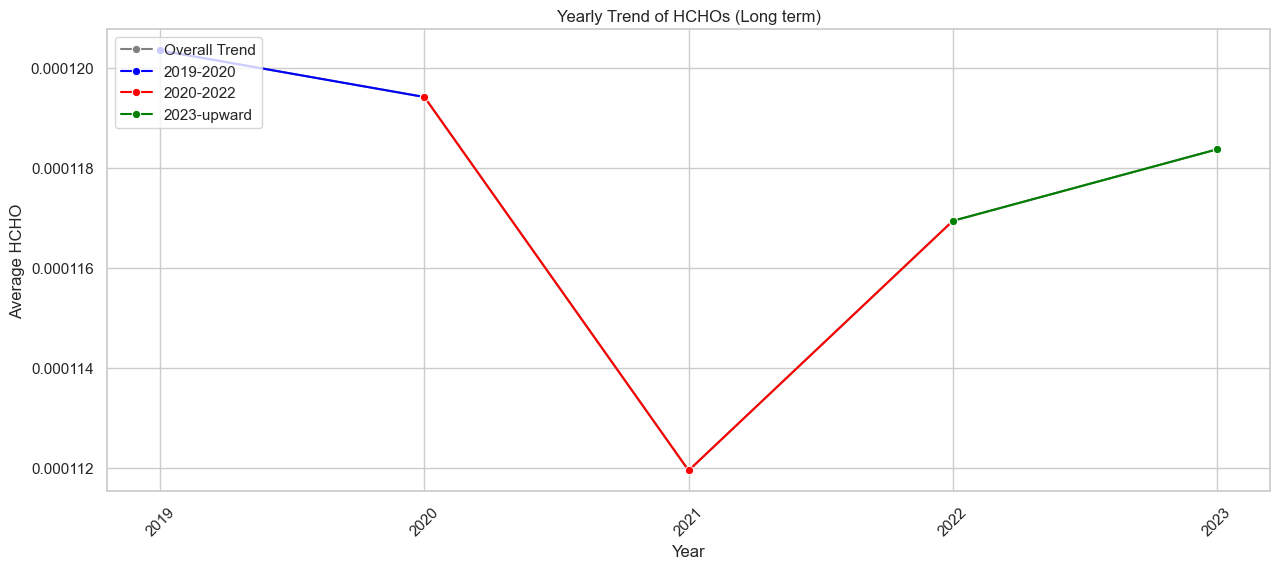

In [14]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Converting 'Current date' to datetime and extracting the year
df['Year'] = pd.to_datetime(df['Current date']).dt.year
yearly_data = df.groupby('Year')['HCHO'].mean().reset_index()

# Plotting the yearly trend of HCHOs
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='HCHO', data=yearly_data, color='gray', label='Overall Trend',marker='o')

# Highlighting the periods
pre_corona = yearly_data[(yearly_data['Year'] >= 2019) & (yearly_data['Year'] <= 2020)]
sns.lineplot(x='Year', y='HCHO', data=pre_corona, color='blue', label='2019-2020', marker='o')

corona = yearly_data[(yearly_data['Year'] >= 2020) & (yearly_data['Year'] <= 2022)]
sns.lineplot(x='Year', y='HCHO', data=corona, color='red', label='2020-2022',marker='o')

post_corona = yearly_data[yearly_data['Year'] >= 2022]
sns.lineplot(x='Year', y='HCHO', data=post_corona, color='green', label='2023-upward',marker='o')

plt.title('Yearly Trend of HCHOs (Long term)')
plt.xlabel('Year')
plt.ylabel('Average HCHO')
plt.xticks(np.arange(min(yearly_data['Year']), max(yearly_data['Year'])+1, 1), rotation=45)
plt.legend(loc='upper left')
plt.show()

In [15]:
import plotly.express as px

# Filter data for the years 2019 
filtered_data = df[df['Year'].isin([2019])]

# Calculate the mean HCHO for each month and year
monthly_data = filtered_data.groupby(['Year', 'Month'])['HCHO'].mean().reset_index()

# Create an interactive plot
fig = px.line(monthly_data, x='Month', y='HCHO', color='Year', title='Monthly Trend of HCHO Levels (Pre Corona Period 2019)',
              labels={'Month': 'Month', 'HCHO': 'Average HCHO Reading', 'Year': 'Year'})

# Format y-axis to display values in standard notation
fig.update_layout(yaxis_tickformat=".10f")

fig.show()

In [16]:
# Filter data for the years 2020 to 2022
filtered_data = df[df['Year'].isin([2020,2021])]

# Calculate the mean HCHO for each month and year
monthly_data = filtered_data.groupby(['Year', 'Month'])['HCHO'].mean().reset_index()

# Create an interactive plot
fig = px.line(monthly_data, x='Month', y='HCHO', color='Year', title='Monthly Trend of HCHO Levels (Corona Period 2020 to 2022)',
              labels={'Month': 'Month', 'HCHO': 'Average HCHO Reading', 'Year': 'Year'})

# Format y-axis to display values in standard notation
fig.update_layout(yaxis_tickformat=".10f")

fig.show()

In [17]:
# Filter data for the years 2023 upward
filtered_data = df[df['Year'].isin([2022,2023,2024])]

# Calculate the mean HCHO for each month and year
monthly_data = filtered_data.groupby(['Year', 'Month'])['HCHO'].mean().reset_index()

# Create an interactive plot
fig = px.line(monthly_data, x='Month', y='HCHO', color='Year', title='Monthly Trend of HCHO Levels (Post Corona Period)',
              labels={'Month': 'Month', 'HCHO': 'Average HCHO Reading', 'Year': 'Year'})

# Format y-axis to display values in standard notation
fig.update_layout(yaxis_tickformat=".10f")

fig.show()

### Bar and Pie Chart - Average HCHO Levels for Each Location

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5784\1333282147.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




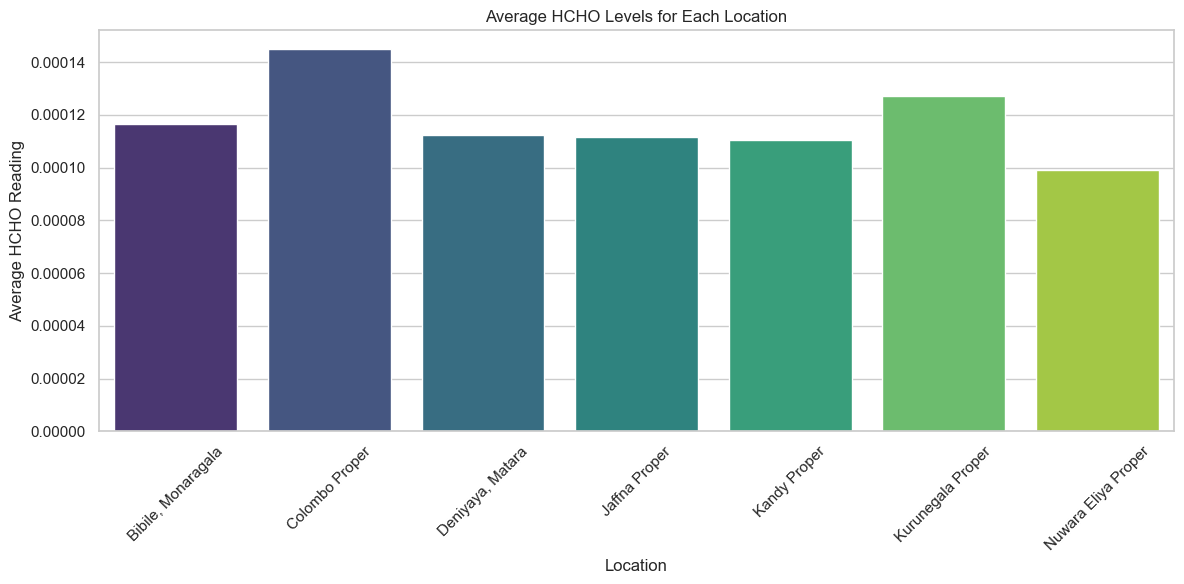

In [18]:
# Calculate the mean HCHO for each location
location_data = df.groupby('Location')['HCHO'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='HCHO', data=location_data, palette='viridis')
plt.title('Average HCHO Levels for Each Location')
plt.xlabel('Location')
plt.ylabel('Average HCHO Reading')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Create pie chart
fig = px.pie(location_data, values='HCHO', names='Location', title='Average HCHO Levels for Each Location')

# Update pie chart layout to make it larger
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4)
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5784\1160256607.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




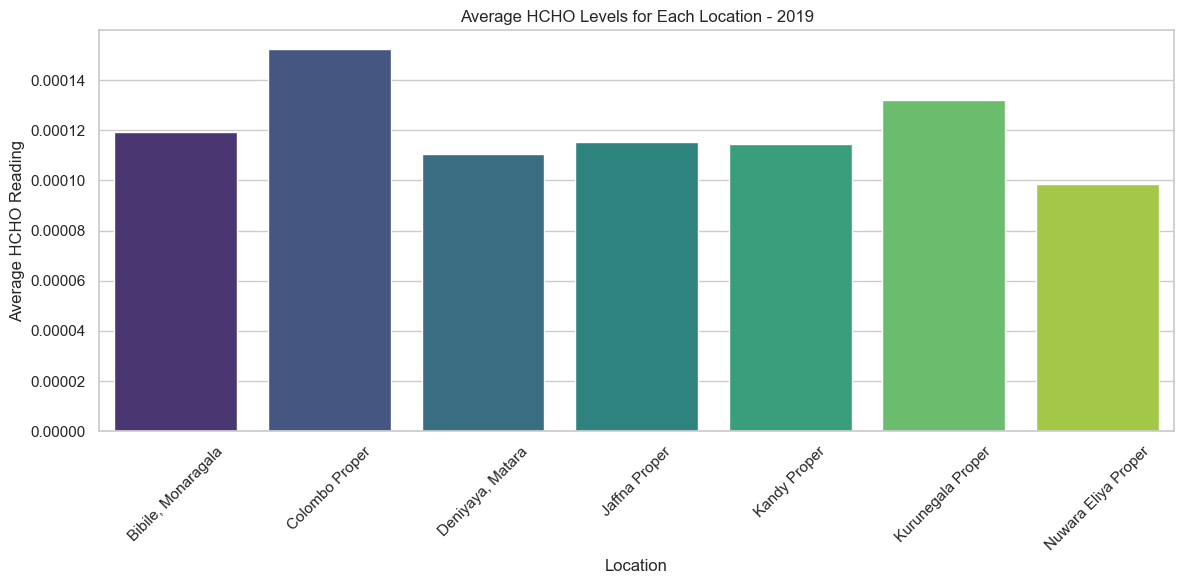

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5784\1160256607.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




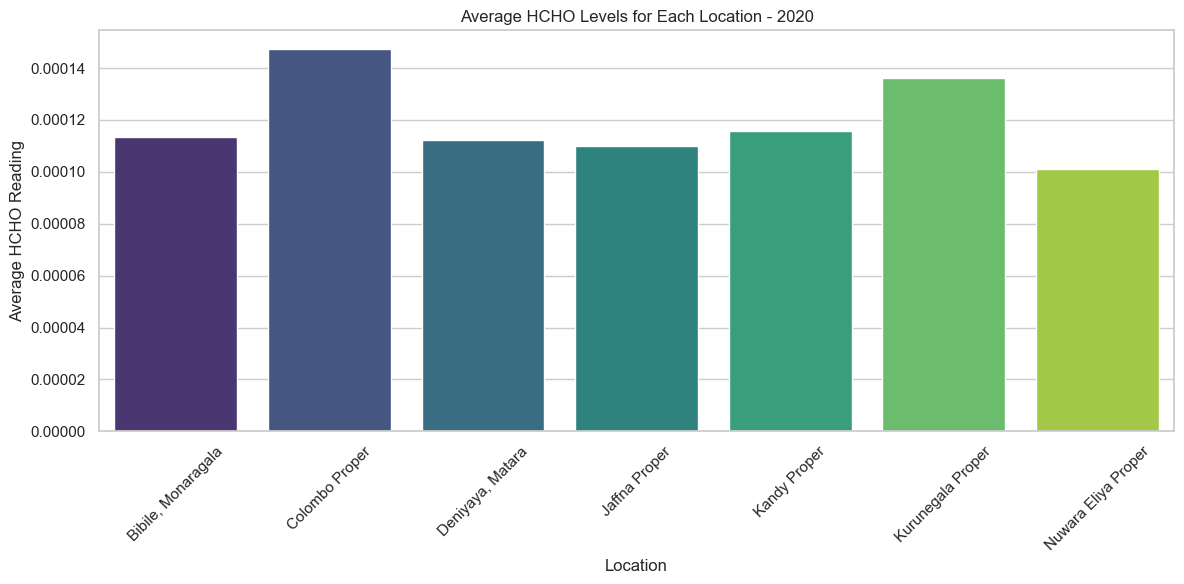

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5784\1160256607.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




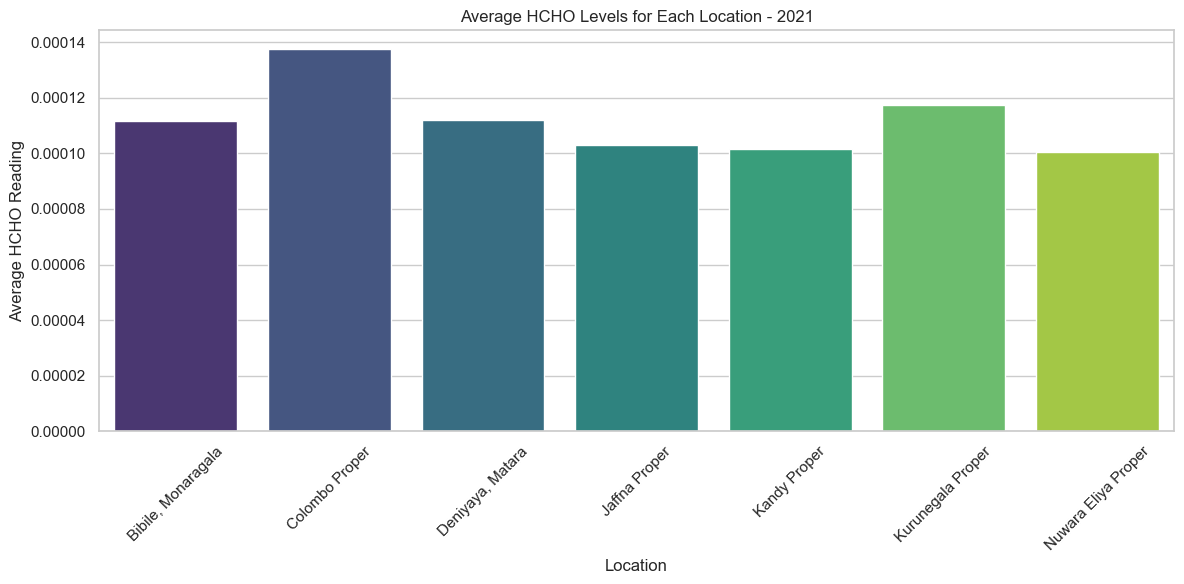

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5784\1160256607.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




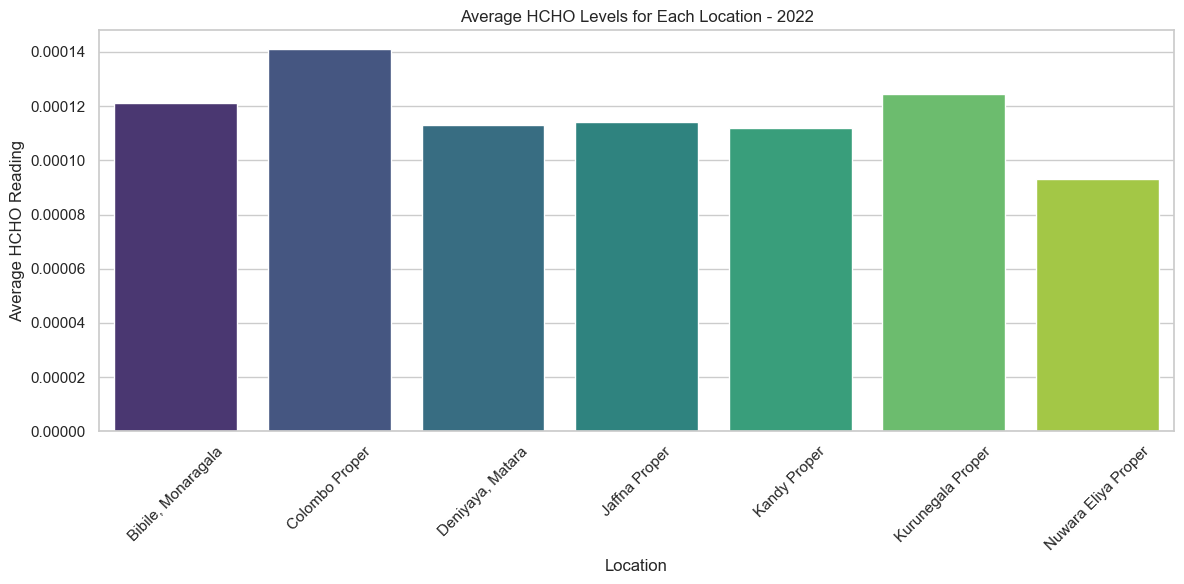

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5784\1160256607.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




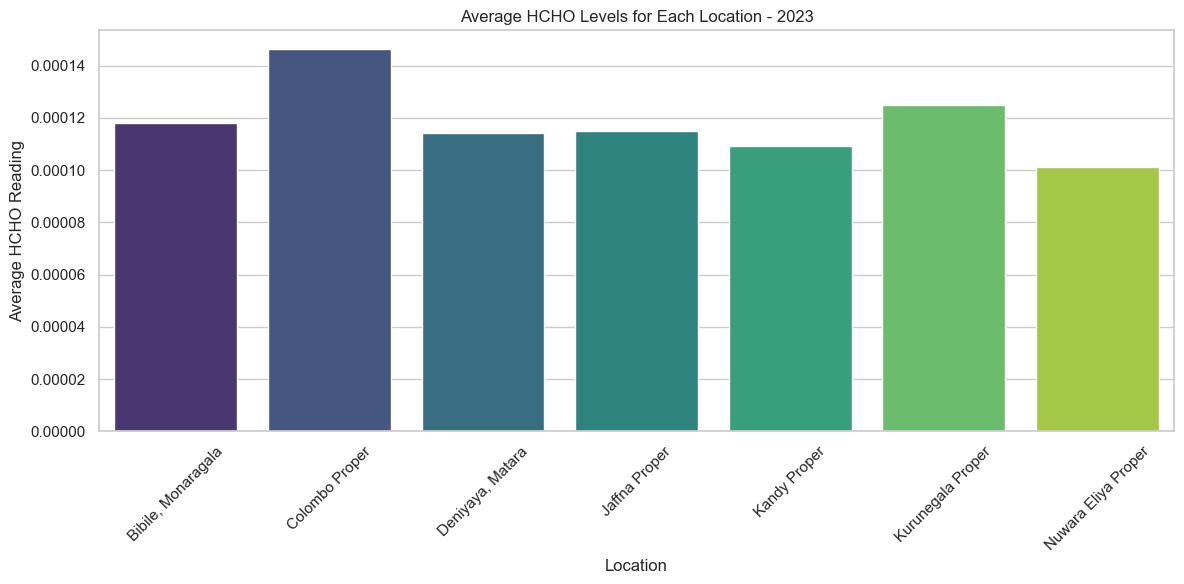

In [19]:
# Calculate the mean HCHO for each location
location_data = df.groupby(['Location', pd.to_datetime(df['Current date']).dt.year])['HCHO'].mean().reset_index()

# Create bar plots and pie charts for each year
years = location_data['Current date'].unique()

for year in years:
    data_year = location_data[location_data['Current date'] == year]
    
    # Create bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Location', y='HCHO', data=data_year, palette='viridis')
    plt.title(f'Average HCHO Levels for Each Location - {year}')
    plt.xlabel('Location')
    plt.ylabel('Average HCHO Reading')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Create pie chart
    fig = px.pie(data_year, values='HCHO', names='Location', title=f'Average HCHO Levels for Each Location - {year}')

    # Update pie chart layout to make it larger
    fig.update_layout(
        autosize=False,
        width=800,
        height=600,
        margin=dict(l=50, r=50, b=100, t=100, pad=4)
    )

    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

### Heatmap - HCHO Levels by Location and Date

In [20]:
# Loop through each unique location and create a heatmap
for location in df['Location'].unique():
    location_data = df[df['Location'] == location].pivot_table(index='Location', columns='Current date', values='HCHO', aggfunc='mean')
    
    fig = px.imshow(location_data, labels=dict(color="Average HCHO Reading"),
                    title=f'HCHO Levels for {location}',
                    x=location_data.columns.strftime('%Y-%m-%d'),
                    y=location_data.index)
    
    fig.show()

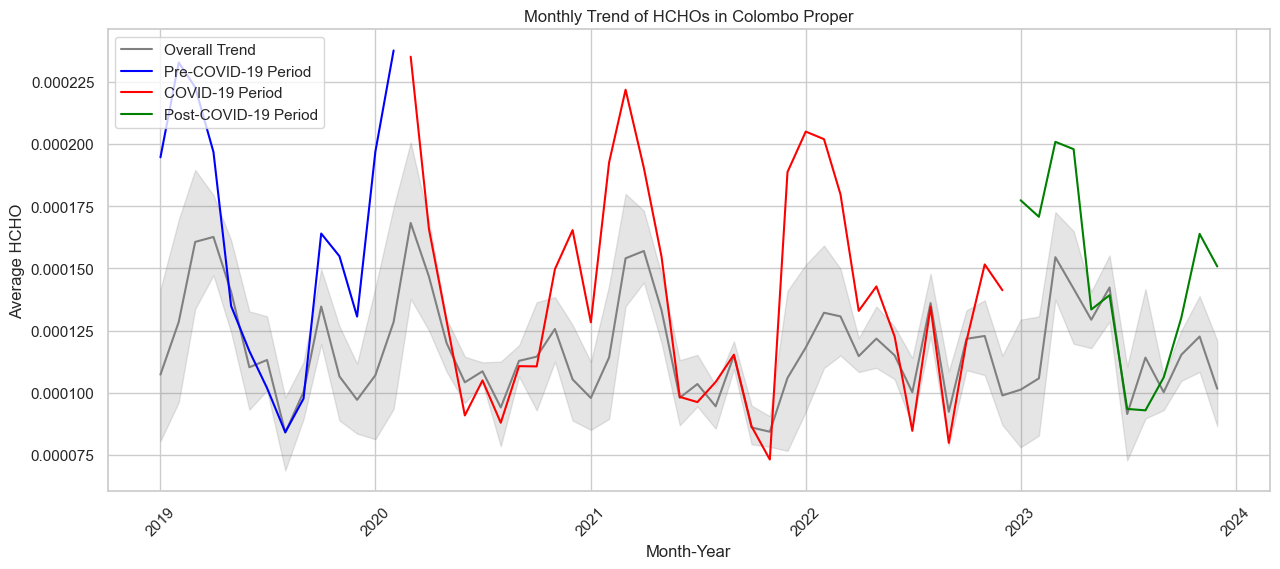

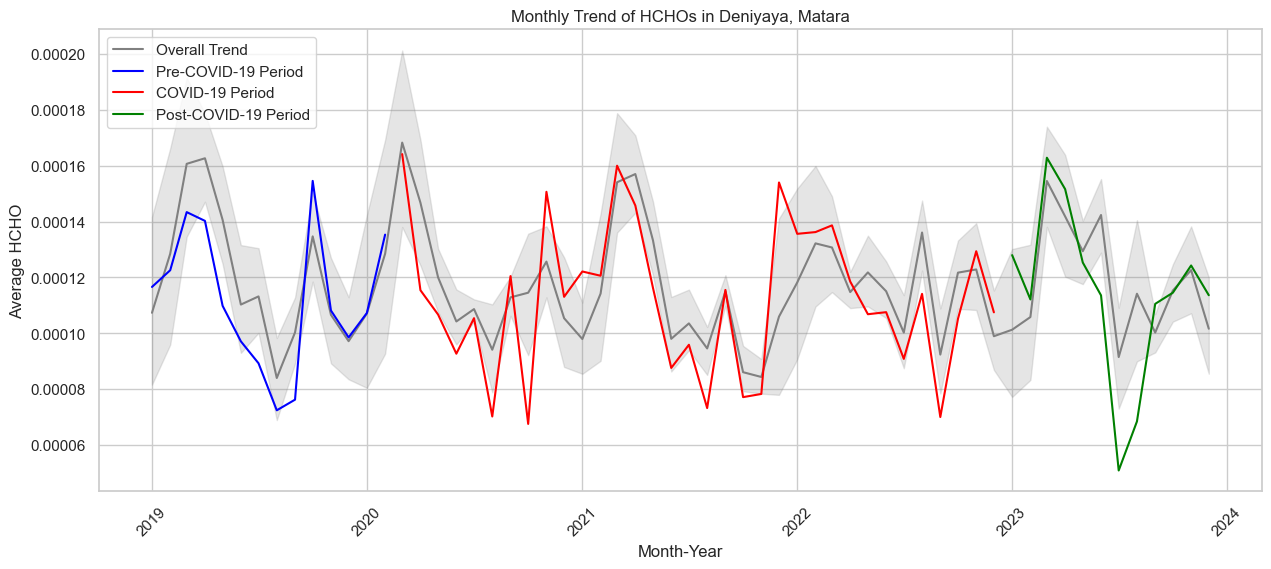

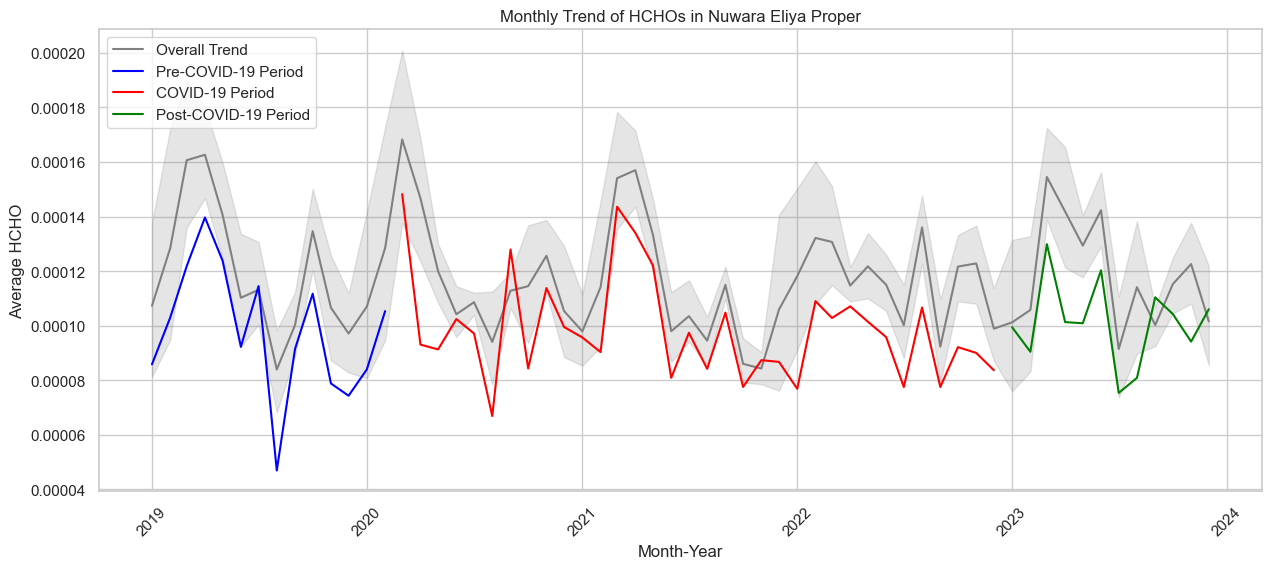

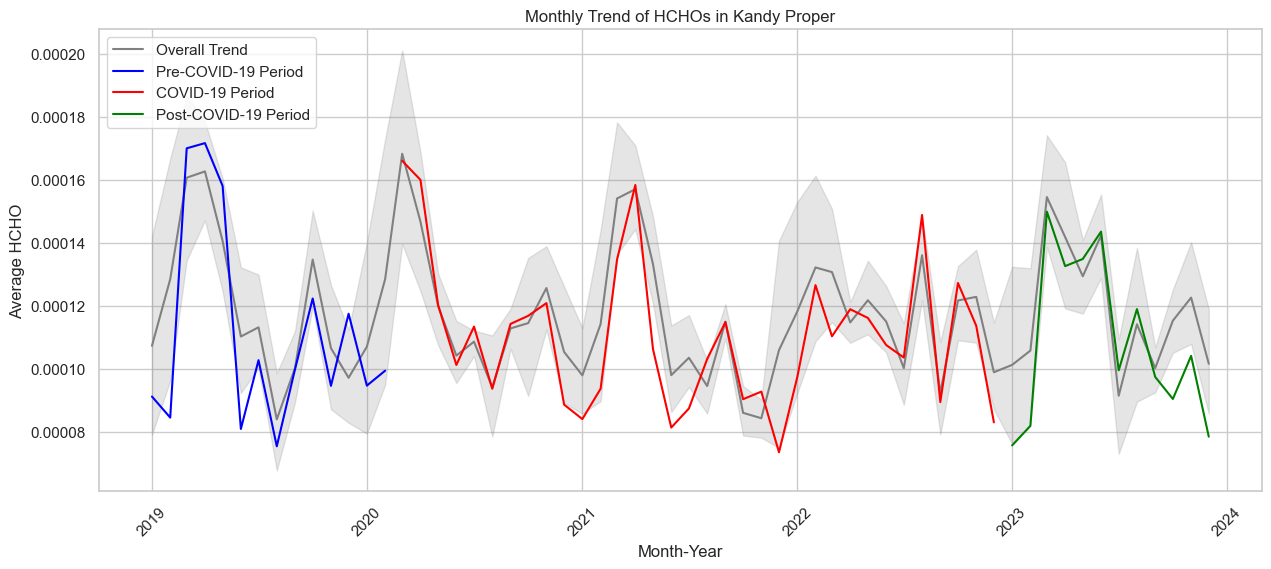

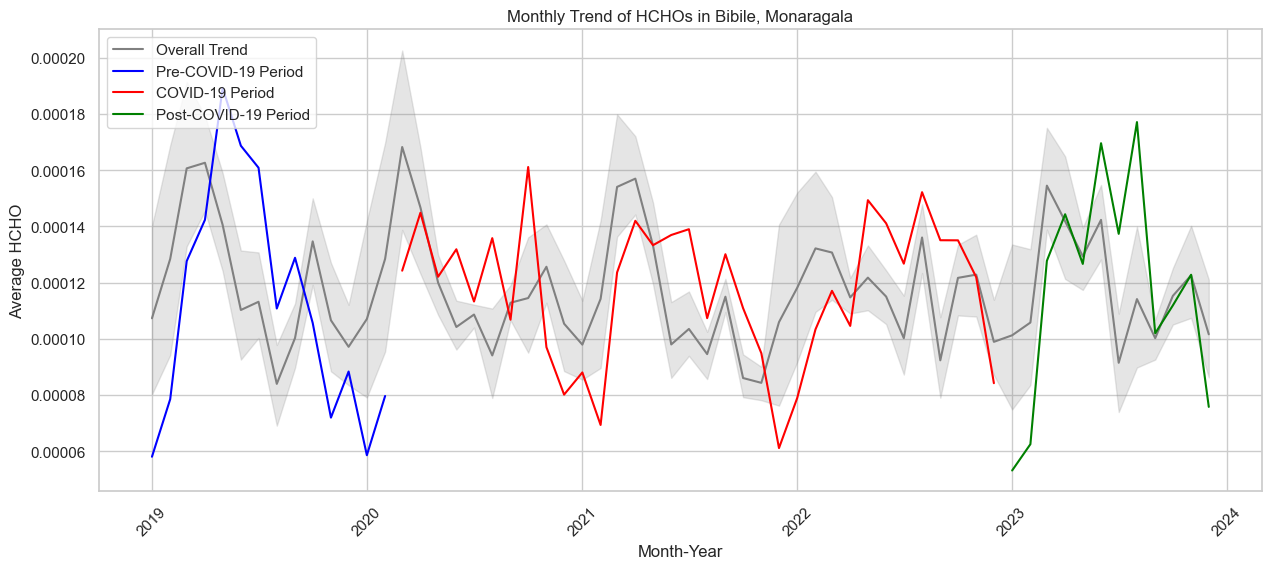

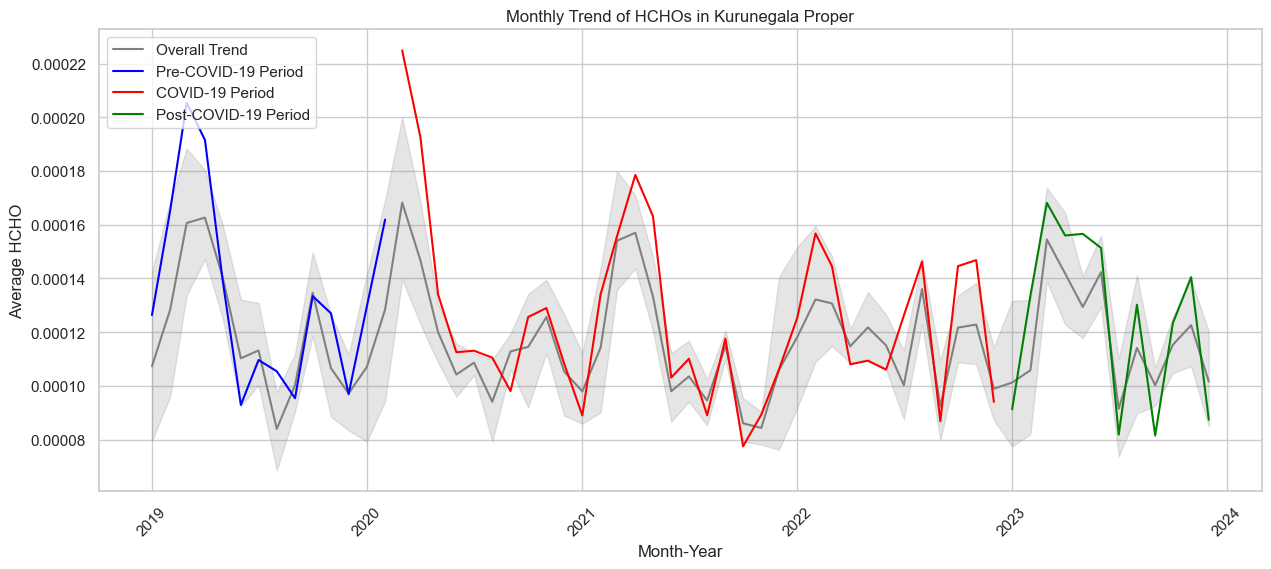

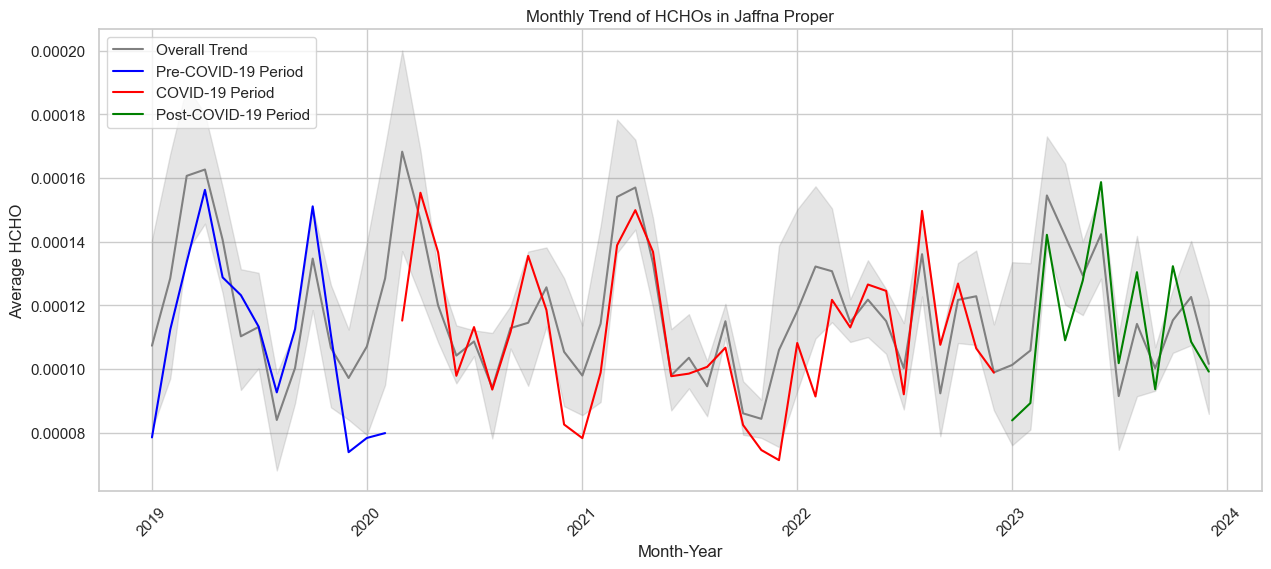

In [21]:
# Convert 'Current date' to datetime format
df['Current date'] = pd.to_datetime(df['Current date'])

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Convert 'Current date' to datetime and extracting the month and year
df['Month-Year'] = df['Current date'].dt.to_period('M')
monthly_data = df.groupby(['Location', 'Month-Year'])['HCHO'].mean().reset_index()

# Convert 'Month-Year' back to datetime for plotting
monthly_data['Month-Year'] = monthly_data['Month-Year'].dt.to_timestamp()

# Loop through each unique location and create separate plots
for location in df['Location'].unique():
    location_data = monthly_data[monthly_data['Location'] == location]
    
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='Month-Year', y='HCHO', data=monthly_data, color='gray', label='Overall Trend')
    
    # Highlighting the periods
    pre_corona = location_data[(location_data['Month-Year'] >= '2019-01-01') & (location_data['Month-Year'] <= '2020-02-29')]
    sns.lineplot(x='Month-Year', y='HCHO', data=pre_corona, color='blue', label='Pre-COVID-19 Period')
    
    corona = location_data[(location_data['Month-Year'] >= '2020-03-01') & (location_data['Month-Year'] <= '2022-12-31')]
    sns.lineplot(x='Month-Year', y='HCHO', data=corona, color='red', label='COVID-19 Period')
    
    post_corona = location_data[location_data['Month-Year'] >= '2023-01-01']
    sns.lineplot(x='Month-Year', y='HCHO', data=post_corona, color='green', label='Post-COVID-19 Period')
    
    plt.title(f'Monthly Trend of HCHOs in {location}')
    plt.xlabel('Month-Year')
    plt.ylabel('Average HCHO')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.show()

In [22]:
# Plotting location in a Map

In [23]:
import geopandas as gpd

In [24]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Define coordinates for each location
coordinates = {
    'Colombo Proper': (79.8612, 6.9271),
    'Deniyaya, Matara': (80.5445, 6.3522),
    'Nuwara Eliya Proper': (80.7842, 6.9497),
    'Kandy Proper': (80.6358, 7.2906),
    'Bibile, Monaragala': (81.0579, 6.4319),
    'Kurunegala Proper': (80.3854, 7.4844),
    'Jaffna Proper': (80.0098, 9.6615)
}

# Map coordinates to the DataFrame
df['Coordinates'] = df['Location'].map(coordinates)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Coordinates'].apply(lambda x: x[0]), 
                                                       df['Coordinates'].apply(lambda x: x[1])))

# Create base map
m = folium.Map(location=[7.8731, 80.7718], zoom_start=8)  # Centered on Sri Lanka

# Add heatmap
heat_data = [[point.xy[1][0], point.xy[0][0], row['HCHO']] for idx, row in gdf.iterrows() for point in [row['geometry']]]
HeatMap(heat_data, radius=15).add_to(m)

m.save('heatmap.html')


In [25]:
from sklearn.cluster import KMeans
import numpy as np
import folium

# Convert HCHO coordinates to numpy array
coords = np.array(gdf['Coordinates'].tolist())

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(coords)
gdf['Cluster'] = kmeans.labels_

# Create a folium map centered on Sri Lanka
m = folium.Map(location=[7.8731, 80.7718], zoom_start=7)

# Add clustered markers to the map
colors = ['red', 'blue', 'green']
clusters = sorted(gdf['Cluster'].unique())

cluster_details = {}

for cluster in clusters:
    cluster_data = gdf[gdf['Cluster'] == cluster]
    cluster_details[cluster] = {
        'count': len(cluster_data),
        'average_HCHO': cluster_data['HCHO'].mean()
    }
    
    for i, row in cluster_data.iterrows():
        folium.CircleMarker(
            location=[row['Coordinates'][1], row['Coordinates'][0]],  # Latitude, Longitude
            radius=10,
            popup=f"<strong>Location:</strong> {row['Location']}<br><strong>Cluster:</strong> {cluster}<br><strong>Average HCHO:</strong> {row['HCHO']}",
            color=colors[cluster],
            fill=True,
            fill_color=colors[cluster]
        ).add_to(m)

# Add legend
for i, color in enumerate(colors):
    folium.CircleMarker(
        location=[0, 0],
        radius=0,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=f"Cluster {clusters[i]}: {cluster_details[clusters[i]]['count']} locations, Avg HCHO: {cluster_details[clusters[i]]['average_HCHO']:.6f}"
    ).add_to(m)

# Save the map to an HTML file
m.save('clustered_hcho_map.html')

# Print cluster details
for cluster, details in cluster_details.items():
    print(f"Cluster {cluster}:")
    print(f"Number of locations: {details['count']}")
    print(f"Average HCHO level: {details['average_HCHO']:.6f}\n")


Cluster 0:
Number of locations: 1813
Average HCHO level: 0.000111

Cluster 1:
Number of locations: 9036
Average HCHO level: 0.000113

Cluster 2:
Number of locations: 1805
Average HCHO level: 0.000145



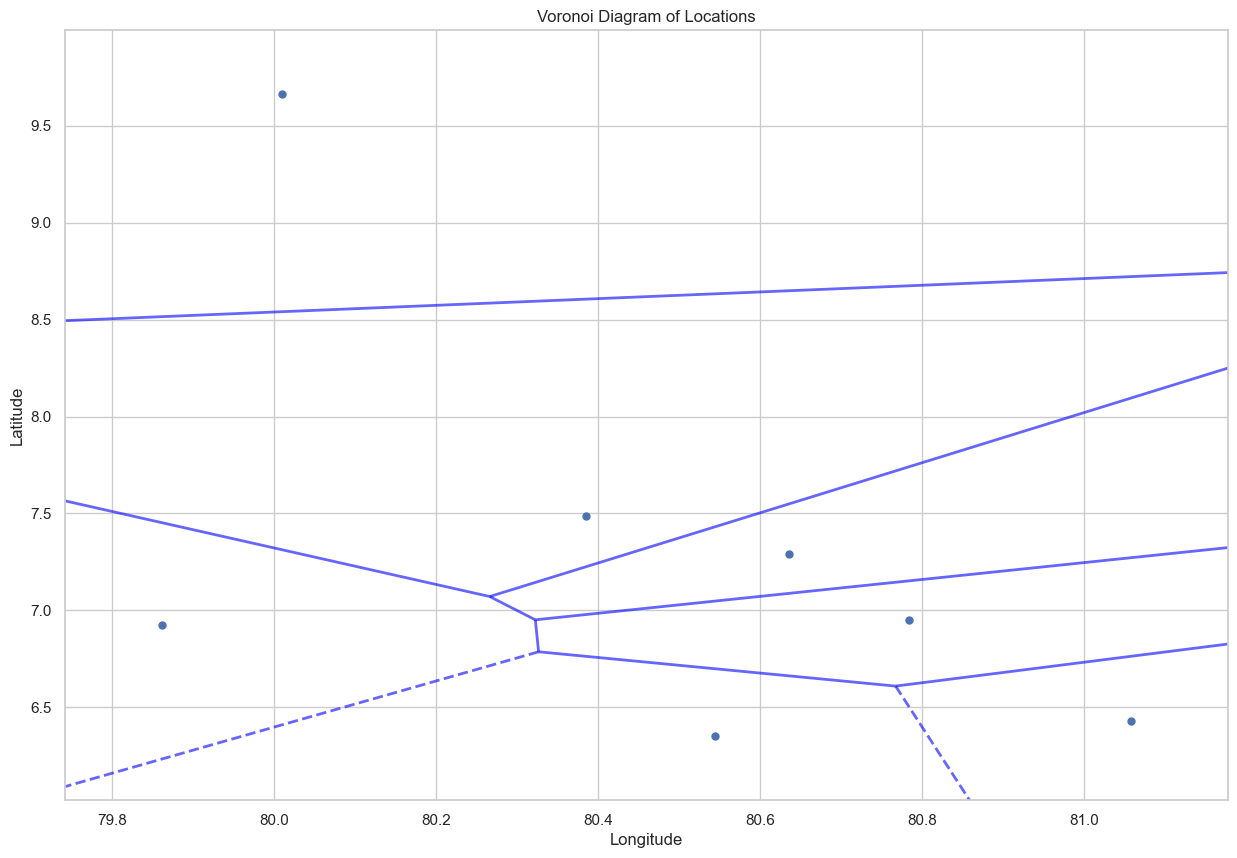

In [26]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Convert coordinates to numpy array
coords = np.array(list(coordinates.values()))

# Compute Voronoi diagram
vor = Voronoi(coords)

# Plot Voronoi diagram
fig, ax = plt.subplots(figsize=(15, 10))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='blue', line_width=2, line_alpha=0.6, point_size=10)
ax.set_title('Voronoi Diagram of Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


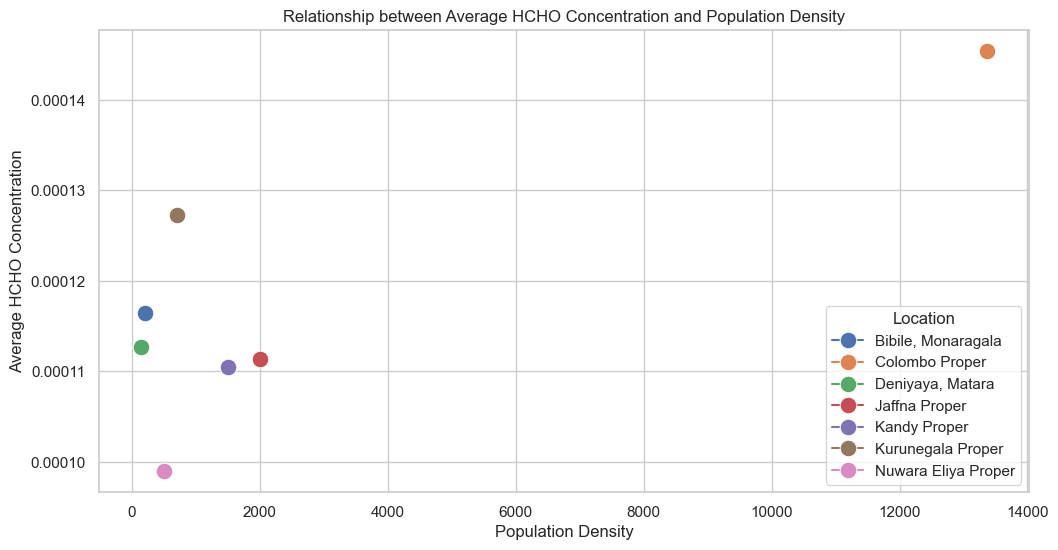

In [27]:
# Convert 'Current date' to datetime format
df['Current date'] = pd.to_datetime(df['Current date'])

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Convert 'Current date' to datetime and extracting the month and year
df['Month-Year'] = df['Current date'].dt.to_period('M')
monthly_data = df.groupby(['Location', 'Month-Year'])['HCHO'].mean().reset_index()

# Merge with population density data
population_density = {
    'Location': ['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper',
                 'Kandy Proper', 'Bibile, Monaragala', 'Kurunegala Proper',
                 'Jaffna Proper'],
    'Population Density': [13364, 145, 500, 1500, 200, 700, 2000]
}

df2 = pd.DataFrame(population_density)

# Merge both DataFrames
df_merged = pd.merge(monthly_data.groupby('Location')['HCHO'].mean().reset_index(), df2, on='Location')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_merged, x='Population Density', y='HCHO', hue='Location', marker='o',markersize=12)
plt.title('Relationship between Average HCHO Concentration and Population Density')
plt.xlabel('Population Density')
plt.ylabel('Average HCHO Concentration')
plt.grid(True)
plt.show()

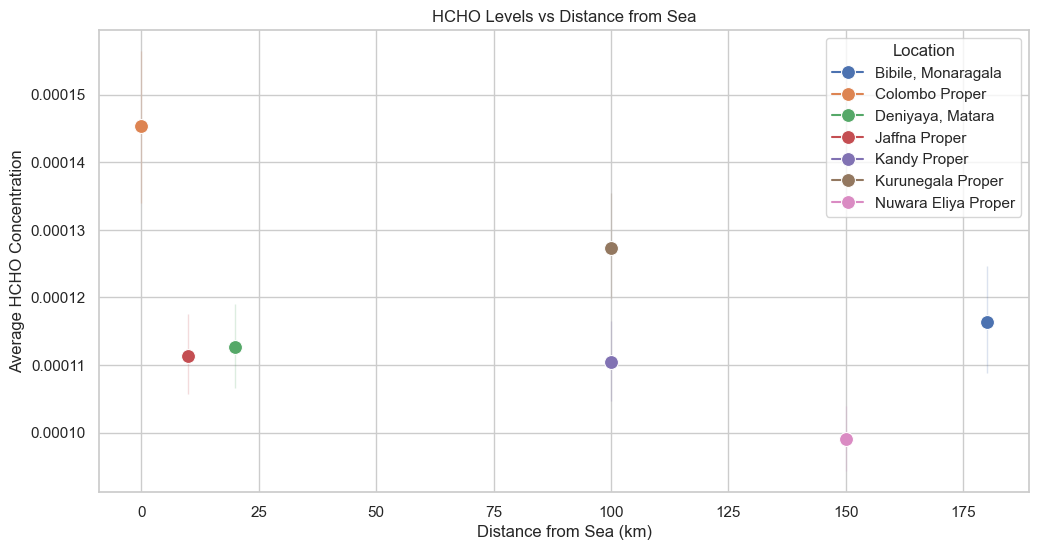

In [28]:
distance_from_sea = {
    'Colombo Proper': 0,
    'Deniyaya, Matara': 20,
    'Nuwara Eliya Proper': 150,
    'Kandy Proper': 100,
    'Bibile, Monaragala': 180,
    'Kurunegala Proper': 100,
    'Jaffna Proper': 10
}


# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Convert 'Current date' to datetime and extracting the month and year
df['Month-Year'] = df['Current date'].dt.to_period('M')
monthly_data = df.groupby(['Location', 'Month-Year'])['HCHO'].mean().reset_index()

# Merge with distance from sea data
df2 = pd.DataFrame({'Location': list(distance_from_sea.keys()), 'Distance from Sea (km)': list(distance_from_sea.values())})
df_merged = pd.merge(monthly_data, df2, on='Location')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_merged, x='Distance from Sea (km)', y='HCHO', hue='Location', marker='o', markersize=10)
plt.title('HCHO Levels vs Distance from Sea')
plt.xlabel('Distance from Sea (km)')
plt.ylabel('Average HCHO Concentration')
plt.grid(True)
plt.show()

AttributeError: PathCollection.set() got an unexpected keyword argument 'kind'

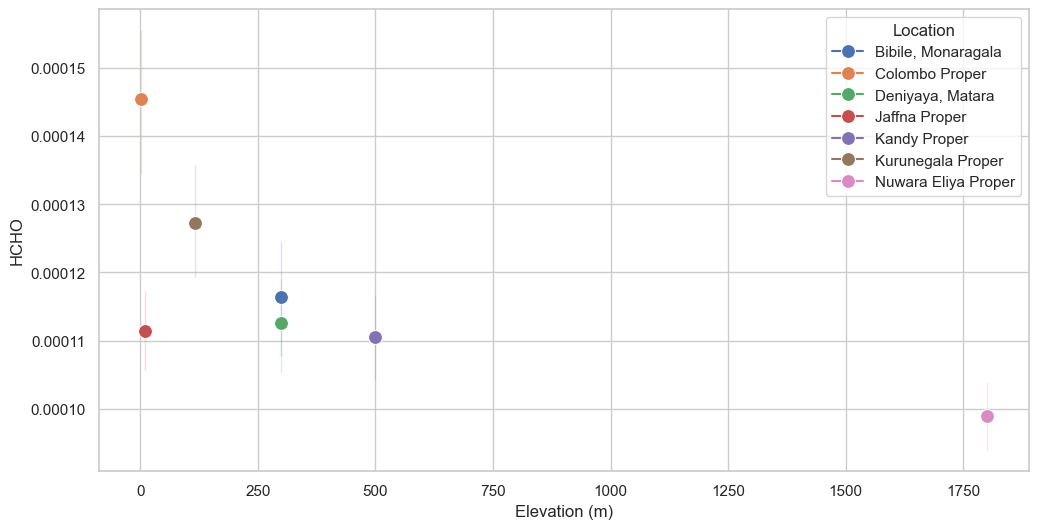

In [29]:
elevation = {
    'Colombo Proper': 2,
    'Deniyaya, Matara': 300,
    'Nuwara Eliya Proper': 1800,
    'Kandy Proper': 500,
    'Bibile, Monaragala': 300,
    'Kurunegala Proper': 116,
    'Jaffna Proper': 10
}

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Convert 'Current date' to datetime and extracting the month and year
df['Month-Year'] = df['Current date'].dt.to_period('M')
monthly_data = df.groupby(['Location', 'Month-Year'])['HCHO'].mean().reset_index()

# Merge with elevation data
df2 = pd.DataFrame({'Location': list(elevation.keys()), 'Elevation (m)': list(elevation.values())})
df_merged = pd.merge(monthly_data, df2, on='Location')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_merged, x='Elevation (m)', y='HCHO', hue='Location', marker='o', markersize=10)

# Add connecting lines
sns.scatterplot(data=df_merged, x='Elevation (m)', y='HCHO', hue='Location', s=0, kind='line')

plt.title('HCHO Levels vs Elevation')
plt.xlabel('Elevation (m)')
plt.ylabel('Average HCHO Concentration')
plt.grid(True)
plt.show()

Weather Changes over the year in each city 

2019